# <center> TP 1 : Analyse exploratoire et analyse visuelle de données avec la librairie Pandas et Seaborn

##  <center> Analyse des données de maladies cardiovasculaires

Pour vous entraîner avec les librairies Pandas et Seaborn, et aussi l’AED (Analyse Exploratoire de Données), vous pouvez remplir les lignes ci-dessous où vous analyserez un ensemble de données sur les maladies cardiovasculaires.

To train with the Pandas and Seaborn libraries, and also EDA (Exploratory Data Analysis), you can fill in the lines below where you will analyze a set of cardiovascular disease data.

### Problème

Prédire la présence ou l'absence de maladie cardiovasculaire (MCV) en utilisant les résultats de l'examen du patient.

Predict the presence or absence of cardiovascular disease (CVD) using patient examination results.

### Description des données

Il existe 3 types de caractéristiques d'entrée:

- *Objectives*: informations factuelles;
- *Examinées*: résultats d'un examen médical;
- *Subjectives*: informations données par le patient.

There are 3 types of input characteristics:

- *Objectives*: factual information;
- *Examined*: results of a medical examination;
- *Subjective*: information given by the patient.

La description des données en anglais :

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Toutes les valeurs du dataset ont été collectées au moment de l'examen médical.

All dataset values were collected at the time of the medical examination.

# Analyse préliminaire des données

Tout d'abord, nous allons initialiser l'environnement:

**Ex.1 : Importez tout les bibliothèques nécessaires : `pandas`, `numpy` et `seaborn`**

In [1]:
# You code here
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sns.__version__

'0.13.2'

Configurons les bibliothèques `seaborn` and `matplotlib` pour l'analyse visuelle :

In [42]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 12
    }
)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

**Ex.2 : Chargez les données (en utilisant la méthode `read_csv`) du lien `url` indiqué ci-dessous, et affichez les 5 premières lignes en utilisant la méthode `head`:**

In [43]:
# You code here
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv"
df = pd.read_csv(url, sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Il serait instructif de jeter un coup d'oeil aux valeurs de nos variables.

Convertissons les données au format *long* et affichons le nombre de valeurs des entités catégoriques en utilisant [`factorplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html).

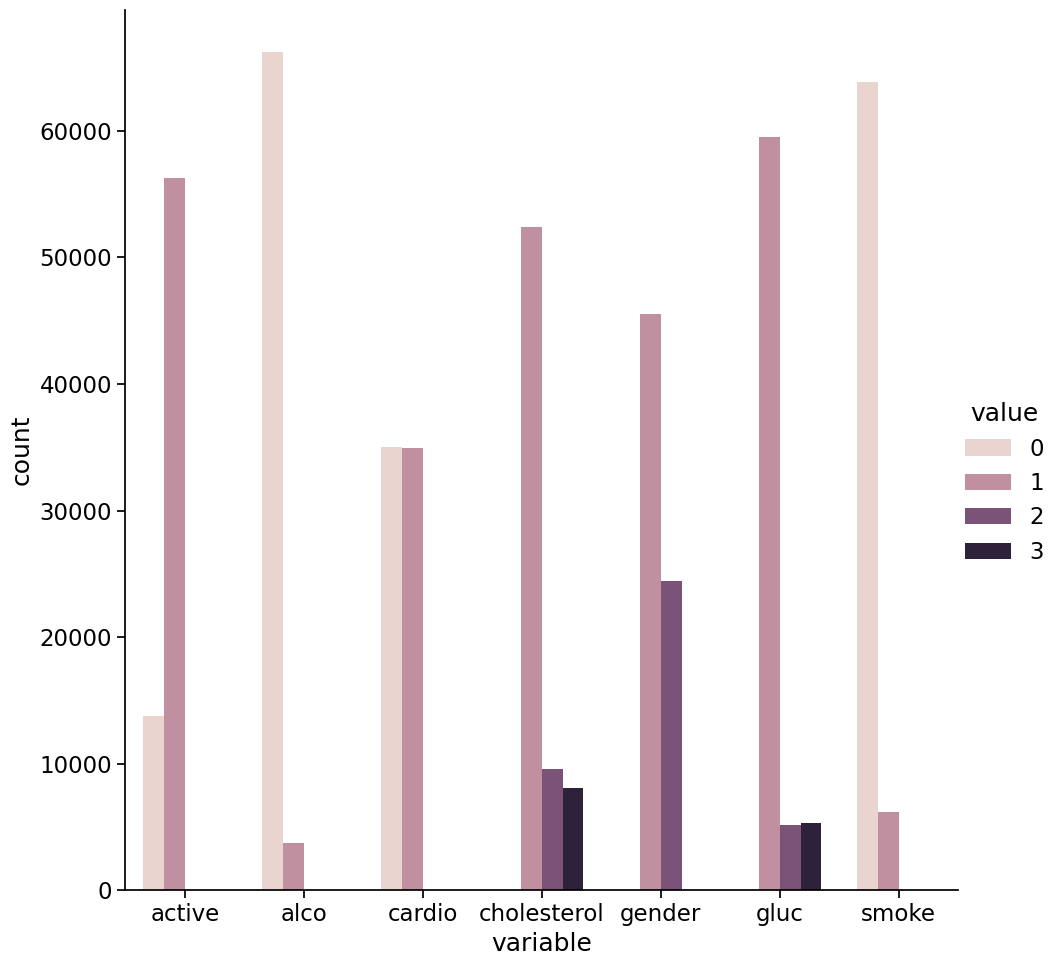

In [46]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

#sns.factorplot(x='variable', y='count', hue='value', 
#               data=df_uniques, kind='bar', size=12);
sns.catplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar',width=0.7, height=10);

Nous pouvons voir que les classes cibles (cardio = {0,1}) sont équilibrées. C'est génial !

Separons l'ensemble des données selon les valeurs cibles. Peut-on déjà repérer la caractéristique la plus significative simplement en regardant les graphiques ?

We can see that the target classes (cardio = {0,1}) are balanced. It's awesome !

Let's separate the data set according to the target values. Can we already spot the most significant feature just by looking at the graphs?

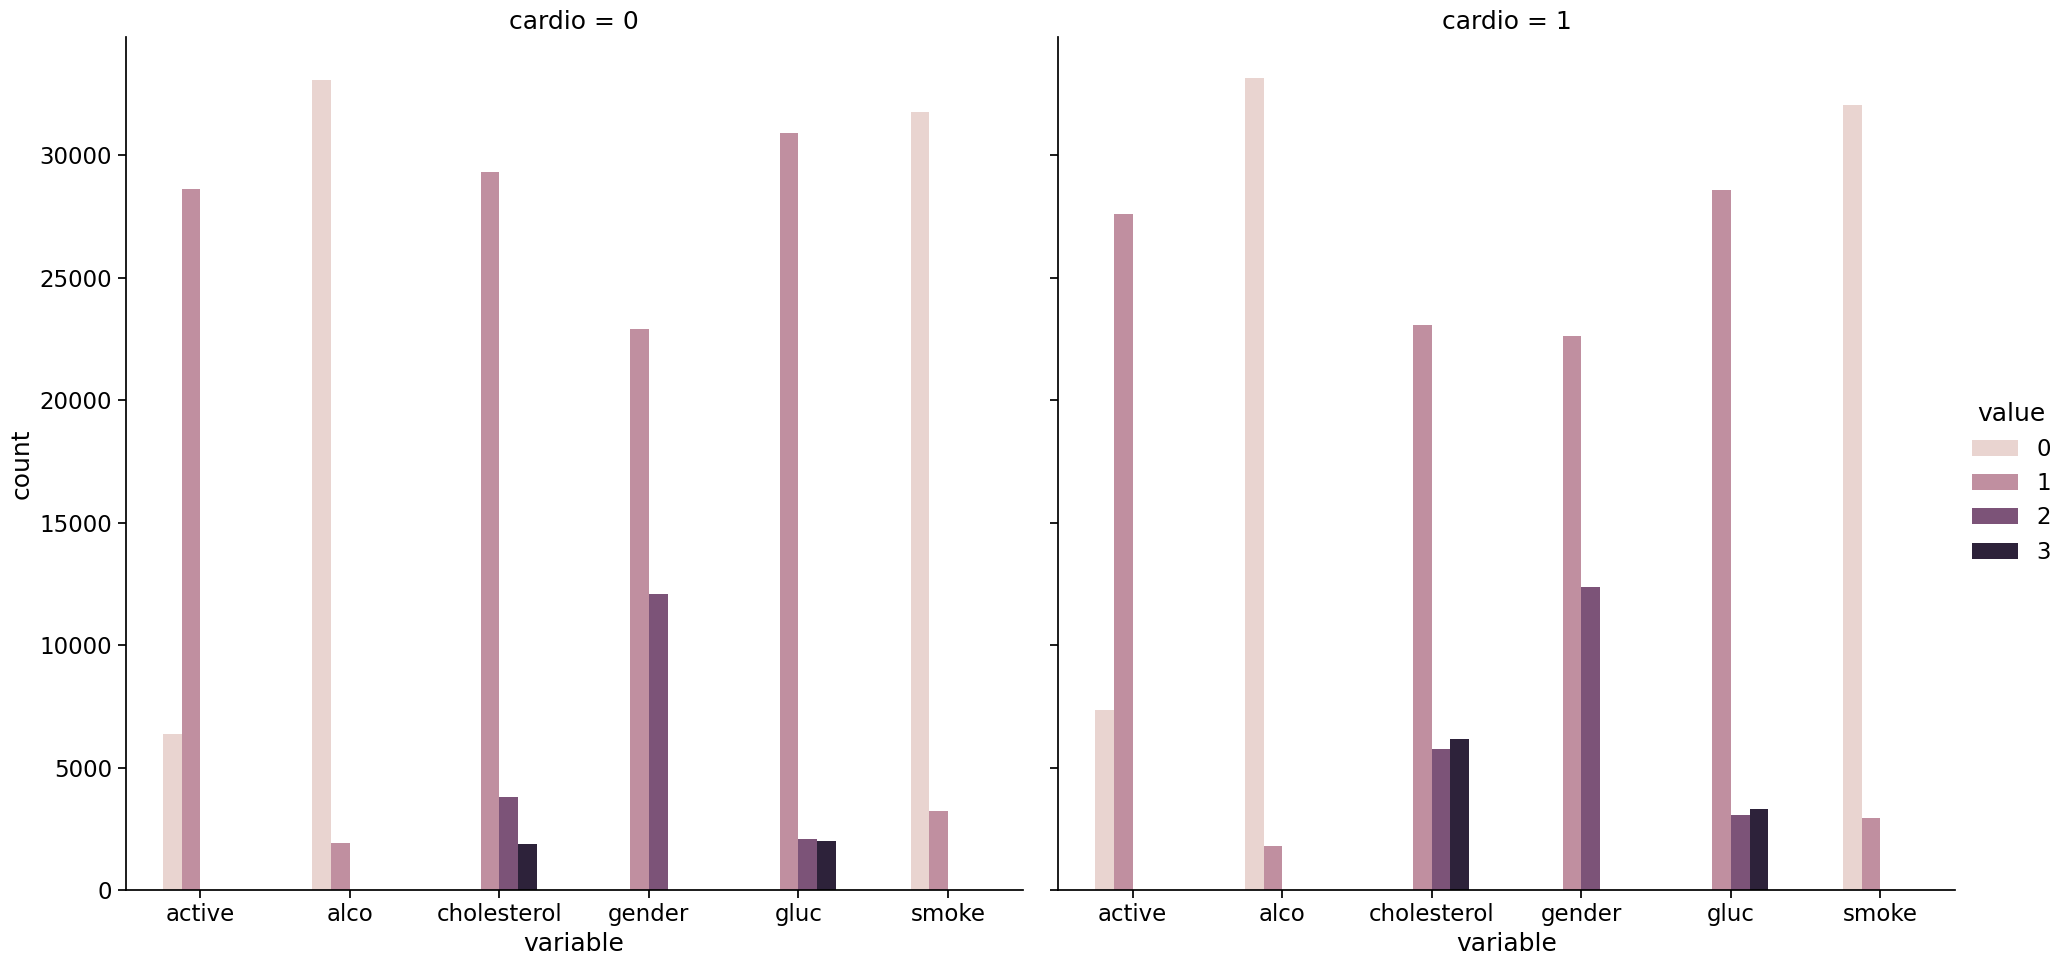

In [16]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

#sns.factorplot(x='variable', y='count', hue='value', 
#               col='cardio', data=df_uniques, kind='bar', size=9);
sns.catplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar',width=0.5, height=10);

On peut voir que la distribution des niveaux de cholestérol et de glucose diffère grandement par la valeur de la variable cible. Est-ce une coïncidence?

Maintenant, calculons quelques statistiques pour les valeurs uniques de la caracteristique:

It can be seen that the distribution of cholesterol and glucose levels differs greatly by the value of the target variable. Is it a coincidence?

Now, let's calculate some statistics for the unique values of the characteristic:

In [17]:
print("All features unique values : \n")
print("\t", 10 * '-')
for c in df.columns:
    n = df[c].nunique()
    print("\t", c)
    if n <= 3:
        print("\t", n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print("\t", n)
    print("\t", 10 * '-')

All features unique values : 

	 ----------
	 id
	 70000
	 ----------
	 age
	 8076
	 ----------
	 gender
	 2 [(1, 45530), (2, 24470)]
	 ----------
	 height
	 109
	 ----------
	 weight
	 287
	 ----------
	 ap_hi
	 153
	 ----------
	 ap_lo
	 157
	 ----------
	 cholesterol
	 3 [(1, 52385), (2, 9549), (3, 8066)]
	 ----------
	 gluc
	 3 [(1, 59479), (2, 5190), (3, 5331)]
	 ----------
	 smoke
	 2 [(0, 63831), (1, 6169)]
	 ----------
	 alco
	 2 [(0, 66236), (1, 3764)]
	 ----------
	 active
	 2 [(0, 13739), (1, 56261)]
	 ----------
	 cardio
	 2 [(0, 35021), (1, 34979)]
	 ----------


**Finalement, nous avons:**
- 5 caractéristiques numériques (hors *id*);
- 7 caractéristiques catégoriques;
- 70000 enregistrements au total.

**Finally, we have:**
- 5 numeric characteristics (excluding *id*);
- 7 categorical characteristics;
- 70000 records in total.

## 1.1. Observations basiques

**Ex. 3 : Combien d'hommes et de femmes sont présents dans cet ensemble de données ?** 

Les valeurs de la caractéristique `gender` n'ont pas été données (c'est pas clair que "1" représente les femmes ou les hommes) - déterminez-le en analysant la taille, en supposant que les hommes sont plus grands en moyenne.

Values for the `gender` characteristic were not given (it's not clear whether "1" represents females or males) - determine this by analyzing height, assuming males are taller on average .

Let's calculate average height for both values of gender:

In [18]:
height_by_gender = df.groupby('gender')['height'].mean()
height_by_gender

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [19]:
male_id, female_id = (1, 2) if height_by_gender[1] > height_by_gender[2] else (2, 1)
print('male_id is {}, female_id is {}'.format(male_id, female_id))

male_id is 2, female_id is 1


161 cm and almost 170 cm on average, so we make a conclusion that gender=1 represents females, and gender=2 – males. So the sample contains 45530 women и 24470 men.

**Ex. 4 : Quel `gender` déclare le plus souvent consommer de l'alcool - hommes ou femmes ?**

Ex. 4: Which `gender` most often reports drinking alcohol - male or female?

In [22]:
alco_by_gender = df.groupby('gender_string')['alco'].mean()
alco_by_gender

gender_string
female    0.025500
male      0.106375
Name: alco, dtype: float64

In [23]:
if alco_by_gender.male > alco_by_gender.female:
    print('Males more often drink alcohol')
else:
    print('Females more often drink alcohol')

Males more often drink alcohol


**Ex. 5 : Quelle est la différence entre les pourcentages de fumeurs chez les hommes et les femmes (arrondi) ?**
**Ex. 5: What is the difference between the percentages of smokers among men and women (rounded)?**

In [24]:
df.groupby('gender_string')['smoke'].mean()

gender_string
female    0.017856
male      0.218880
Name: smoke, dtype: float64

In [25]:
print(
    'The rounded difference between the percentages of smokers among men and women is {:.0f}'.format(
        round(
            100
            * (
                df.loc[df['gender'] == 2, 'smoke'].mean()
                - df.loc[df['gender'] == 1, 'smoke'].mean()
            )
        )
    )
)

The rounded difference between the percentages of smokers among men and women is 20


**Ex. 6 : Quelle est la différence entre les valeurs médianes d'âge chez les fumeurs et les non-fumeurs (en mois, arrondies) ?** 

Vous devrez déterminer les unités de la caractéristique `age_in_month` dans cet ensemble de données.

**Ex. 6: What is the difference between the median age values for smokers and non-smokers (in months, rounded)?**

You will need to determine the units of the `age_in_month` feature in this dataset.

In [49]:
df.groupby('smoke')['age'].median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

Median age of smokers is 52.4 years, for non-smokers it's 54. We see that the correct answer is 20 months. But here is a way to calculate it exactly:

In [27]:
round((df[df.smoke == 0].age.median() - df[df.smoke == 1].age.median()) / 365.25 * 12)

20

## 1.2. Analyse du BMI (Body Mass Index)

**Ex. 7 : Créez une nouvelle caracteristique – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)).**

Pour ce faire, divisez le poids en kilogrammes par le carré de la taille en mètres. On dit que les valeurs normales du BMI sont de 18,5 à 25.

To do this, divide the weight in kilograms by the square of the height in meters. Normal BMI values are said to be 18.5 to 25.

In [28]:
# You code here
df['bmi'] = df.weight / ((df.height / 100) ** 2)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_string,gender_string2,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,male,male,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,female,female,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,female,female,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,male,male,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,female,female,23.011177


**Ex. 8 : Choisissez les expressions correctes et argumentez votre choix :**

1. La medianne du BMI dans les données se situe dans la plage des valeurs normales du BMI.
2. Le BMI des femmes est en moyenne plus élevé que celui des hommes.
3. Les personnes en bonne santé ont, en moyenne, un BMI plus élevé que les personnes atteintes d'une MCV.
4. Pour les hommes en bonne santé qui ne boivent pas, le BMI est plus proche de la norme que pour les femmes en bonne santé qui ne boivent pas.

**Ex. 8: Choose the correct expressions and argue your choice:**

1. The median BMI in the data is within the range of normal BMI values.
2. The BMI of women is on average higher than that of men.
3. Healthy people have, on average, a higher BMI than people with CVD.
4. For healthy men who do not drink, the BMI is closer to the norm than for healthy women who do not drink.

#### 1

In [29]:
bmi_median = df.bmi.median()
if bmi_median > 18.5 and bmi_median < 25:
    print('1 is correct')
else:
    print('1 is incorrect')

1 is incorrect


#### 2

In [30]:
bmi_by_gender = df.groupby('gender_string').bmi.median()
bmi_by_gender

gender_string
female    26.709402
male      25.910684
Name: bmi, dtype: float64

In [31]:
if bmi_by_gender['female'] > bmi_by_gender['male']:
    print('2 is correct')
else:
    print('2 is incorrect')

2 is correct


#### 3

In [32]:
if df[df.cardio == 0].bmi.median() > df[df.cardio == 1].bmi.median():
    print('3 is correct')
else:
    print('3 is incorrect')

3 is incorrect


#### 4

In [33]:
bmi_by_gender_alco_cardio = df.groupby(['gender_string', 'alco', 'cardio'])['bmi'].median().to_frame()
bmi_by_gender_alco_cardio

bmi
gender_string alco cardio           
female        0    0       25.654372
                   1       27.885187
              1    0       27.885187
                   1       30.110991
male          0    0       25.102391
                   1       26.674874
              1    0       25.351541
                   1       27.530797

In [34]:
bmi_mean1 = df[(df.cardio == 0) & (df.gender_string == 'male') &( df.alco == 0)].bmi.median()
bmi_mean2 = df[(df.cardio == 0) & (df.gender_string == 'female') &( df.alco == 0)].bmi.median()
if (bmi_mean1 - 25) < (bmi_mean2 - 25):
    print('4 is correct')
else:
    print('4 is incorrect')

4 is correct
